# Data Analysis - Brazilian E-Commerce Public Dataset by Olist

In [1]:
# libraries

import pandas as pd
from datetime import datetime
import time

In [2]:
# data

df_customers = pd.DataFrame(pd.read_csv('olist_customers_dataset.csv'))

df_orders_items = pd.DataFrame(pd.read_csv('olist_order_items_dataset.csv'))

df_orders_payments = pd.DataFrame(pd.read_csv('olist_order_payments_dataset.csv'))

df_orders_reviews = pd.DataFrame(pd.read_csv('olist_order_reviews_dataset.csv'))

df_orders = pd.DataFrame(pd.read_csv('olist_orders_dataset.csv'))

df_products = pd.DataFrame(pd.read_csv('olist_products_dataset.csv'))

df_sellers = pd.DataFrame(pd.read_csv('olist_sellers_dataset.csv'))

df_product_categories = pd.DataFrame(pd.read_csv('product_category_name_translation.csv'))

In [3]:
# customers --> customers_id, customer_city, customer_state
# orders_items --> order_id, order_item_id, product_id, seller_id, price, freight_value
# orders_paymets --> order_id, payment_sequential, payment_type, payment_installmets, payment_value
# orders_reviews --> order_id, review_score
# orders --> order_id, customer_id, order_status, order_purchase_timestamp, order_delivered_customer_date, order_estimated_delivery_date
# products --> product_id, product_category_name
# product_categories --> product_category_name, product_category_name_english 

## 1. Vendas

### 1.1. Vendas atuais em Relação ao Objetivo de Vendas Anuais

Objetivo de vendas Anuais: 5% a mais do que o ano anterior

In [4]:
# merge product_category_name to df_orders

df_orders = df_orders.merge(df_orders_items[['order_id', 'product_id']], on='order_id')

df_orders = df_orders.merge(df_products[['product_id', 'product_category_name']], on='product_id')

df_orders

display(df_orders)

# converting dates from strings to datetime

df_orders[['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']] = df_orders[['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']].apply(pd.to_datetime)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,utilidades_domesticas
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,87285b34884572647811a353c7ac498a,utilidades_domesticas
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,87285b34884572647811a353c7ac498a,utilidades_domesticas
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,87285b34884572647811a353c7ac498a,utilidades_domesticas
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,595fac2a385ac33a80bd5114aec74eb8,perfumaria
...,...,...,...,...,...,...,...,...,...,...
112645,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,0df37da38a30a713453b03053d60d3f7,esporte_lazer
112646,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,0df37da38a30a713453b03053d60d3f7,esporte_lazer
112647,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,3d2c44374ee42b3003a470f3e937a2ea,instrumentos_musicais
112648,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,ac35486adb7b02598c182c2ff2e05254,beleza_saude


In [5]:
# ordering the dataset by date of purchase

df_orders = df_orders.sort_values(by='order_purchase_timestamp', ascending=False)
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,product_category_name
78809,54282e97f61c23b78330c15b154c867d,4b7decb9b58e2569548b8b4c8e20e8d7,shipped,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-04 15:25:00,NaT,2018-09-06,b98992ea80b467987a7fbb88e7f2076a,moveis_cozinha_area_de_servico_jantar_e_jardim
29292,35a972d7f8436f405b56e36add1a7140,898b7fee99c4e42170ab69ba59be0a8b,delivered,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-08-29 16:57:00,2018-08-30 16:23:36,2018-09-05,d04857e7b4b708ee8b8b9921163edba3,informatica_acessorios
104707,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 14:52:00,2018-08-29 15:05:22,2018-08-29 20:01:00,2018-08-30 16:36:59,2018-09-03,c7f27c5bef2338541c772b5776403e6a,artigos_de_festas
45367,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:18:28,2018-08-29 14:30:23,2018-08-29 18:51:00,2018-08-30 16:52:31,2018-09-11,bdcf6a834e8faa30dac3886c7a58e92e,beleza_saude
60550,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04,2b4472df15512a2825ae86fd9ae79335,moveis_cozinha_area_de_servico_jantar_e_jardim
...,...,...,...,...,...,...,...,...,...,...
49451,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,5a6b04657a4c5ee34285d1e4619a96b4,beleza_saude
49452,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,5a6b04657a4c5ee34285d1e4619a96b4,beleza_saude
43275,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaT,2016-10-28,f3c2d01a84c947b078e32bbef0718962,telefonia
32995,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20,c1488892604e4ba5cff5b4eb4d595400,moveis_decoracao


In [6]:
# Filtering only not canceled orders

df_orders_nc = df_orders.query("order_status != 'canceled'")
df_orders_nc

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,product_category_name
78809,54282e97f61c23b78330c15b154c867d,4b7decb9b58e2569548b8b4c8e20e8d7,shipped,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-04 15:25:00,NaT,2018-09-06,b98992ea80b467987a7fbb88e7f2076a,moveis_cozinha_area_de_servico_jantar_e_jardim
29292,35a972d7f8436f405b56e36add1a7140,898b7fee99c4e42170ab69ba59be0a8b,delivered,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-08-29 16:57:00,2018-08-30 16:23:36,2018-09-05,d04857e7b4b708ee8b8b9921163edba3,informatica_acessorios
104707,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 14:52:00,2018-08-29 15:05:22,2018-08-29 20:01:00,2018-08-30 16:36:59,2018-09-03,c7f27c5bef2338541c772b5776403e6a,artigos_de_festas
45367,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:18:28,2018-08-29 14:30:23,2018-08-29 18:51:00,2018-08-30 16:52:31,2018-09-11,bdcf6a834e8faa30dac3886c7a58e92e,beleza_saude
60550,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04,2b4472df15512a2825ae86fd9ae79335,moveis_cozinha_area_de_servico_jantar_e_jardim
...,...,...,...,...,...,...,...,...,...,...
49450,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,5a6b04657a4c5ee34285d1e4619a96b4,beleza_saude
49451,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,5a6b04657a4c5ee34285d1e4619a96b4,beleza_saude
49452,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,5a6b04657a4c5ee34285d1e4619a96b4,beleza_saude
32995,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20,c1488892604e4ba5cff5b4eb4d595400,moveis_decoracao


In [7]:
# checking

df_orders_nc['order_status'].unique()

array(['shipped', 'delivered', 'invoiced', 'processing', 'approved',
       'unavailable'], dtype=object)

In [8]:
# last order purchase year

# locate last order date
last_order_purchase_year = df_orders_nc.iloc[0]['order_purchase_timestamp'].year

# finding the previous year
previous_year = last_order_purchase_year - 1

In [9]:
# filtering data from purchases made in the last year

purchases_last_year = df_orders_nc.loc[df_orders_nc['order_purchase_timestamp'].dt.year == last_order_purchase_year]

purchases_last_year

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,product_category_name
78809,54282e97f61c23b78330c15b154c867d,4b7decb9b58e2569548b8b4c8e20e8d7,shipped,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-04 15:25:00,NaT,2018-09-06,b98992ea80b467987a7fbb88e7f2076a,moveis_cozinha_area_de_servico_jantar_e_jardim
29292,35a972d7f8436f405b56e36add1a7140,898b7fee99c4e42170ab69ba59be0a8b,delivered,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-08-29 16:57:00,2018-08-30 16:23:36,2018-09-05,d04857e7b4b708ee8b8b9921163edba3,informatica_acessorios
104707,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 14:52:00,2018-08-29 15:05:22,2018-08-29 20:01:00,2018-08-30 16:36:59,2018-09-03,c7f27c5bef2338541c772b5776403e6a,artigos_de_festas
45367,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:18:28,2018-08-29 14:30:23,2018-08-29 18:51:00,2018-08-30 16:52:31,2018-09-11,bdcf6a834e8faa30dac3886c7a58e92e,beleza_saude
60550,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04,2b4472df15512a2825ae86fd9ae79335,moveis_cozinha_area_de_servico_jantar_e_jardim
...,...,...,...,...,...,...,...,...,...,...
82712,7d0a0773edc4bdca0ef6ab55777718a7,a5c957468ed6f0d66633b446e17e9865,delivered,2018-01-01 10:24:03,2018-01-03 04:14:33,2018-01-05 20:54:35,2018-01-09 13:13:33,2018-01-18,be5679ce5a2343c40455223d7bef6dfb,fashion_bolsas_e_acessorios
29135,67a98eaf984ba84c596f9f5456634f20,b2706ca3ca9a2846e387cb6ed9e74c5a,delivered,2018-01-01 09:36:21,2018-01-01 09:46:25,2018-01-02 20:44:41,2018-01-13 00:43:32,2018-02-01,c4baedd846ed09b85f78a781b522f126,ferramentas_jardim
57672,fbe41a4974e4a492e085d90e5be0b3e3,3afe7d56a3df6e202fc6b851b1cfce3b,delivered,2018-01-01 08:45:04,2018-01-01 08:55:31,2018-01-02 22:33:59,2018-01-05 14:18:41,2018-01-29,a096400f2b6fbe9c868f7dd5f1333e5a,esporte_lazer
82030,0462bad26ccfb8508951beb9ea398ae1,b1449a43a666cba48f485fff0a509b8e,delivered,2018-01-01 08:37:46,2018-01-01 08:48:19,2018-01-02 17:42:48,2018-01-23 18:15:19,2018-02-09,d93d7e81a8d724c4ef661e75647cf325,bebes


In [10]:
# Total number of purchases made in the last year

len(purchases_last_year)

61136

In [11]:
# filtering data from purchases made in the previous year

purchases_previous_year = df_orders_nc.loc[df_orders_nc['order_purchase_timestamp'].dt.year == previous_year]
purchases_previous_year

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,product_category_name
59081,070a76f4c338fe3cda93745a22e51270,de4f592a5c6155b2fe6f87b30aaeec9c,delivered,2017-12-31 23:29:31,2018-01-01 23:26:52,2018-01-02 19:28:35,2018-01-10 19:27:29,2018-02-02,d2d39433df84064b1556612cc52cefca,relogios_presentes
22056,8acda261d8c76b3206d9cb5279d0a18a,dc3daad47c0792f3bd4366246a7955dc,delivered,2017-12-31 23:24:10,2017-12-31 23:32:40,2018-01-04 11:15:57,2018-01-23 22:37:13,2018-02-08,7935ddc510afb7d08989660b382b7f26,papelaria
3302,18f39cbc016f34a22c870ef03cba5641,92566e623b70efba98063150b200cba4,delivered,2017-12-31 22:14:53,2017-12-31 22:26:35,2018-01-02 18:35:39,2018-01-22 22:57:47,2018-01-31,7a10781637204d8d10485c71a6108a2e,relogios_presentes
39121,43e38490d21c8c490334f75c5a7c2861,2f368064b4e6646a7784a46b03b4bcbc,delivered,2017-12-31 21:17:54,2017-12-31 21:27:24,2018-01-02 20:17:58,2018-01-05 17:59:20,2018-02-01,ba9f160a6ae1c23f25d690fd06fe4fd8,brinquedos
69670,60d98124c3228470422ecadff6550e3c,98a1a1e41310f70974831b79bf01e4e6,delivered,2017-12-31 21:10:02,2017-12-31 21:26:47,2018-01-02 15:08:20,2018-01-05 18:51:54,2018-01-18,cbd63fa909c967a6416090f22a76abd8,informatica_acessorios
...,...,...,...,...,...,...,...,...,...,...
83077,6acecf438369055d9243e121045cca74,42d857e22f61f10476f0cda1aacc018a,delivered,2017-01-05 12:11:23,2017-01-07 03:44:07,2017-01-11 16:22:53,2017-01-17 16:06:30,2017-02-13,1514ddb0f4a5afc8d24104e89c714403,pet_shop
69809,7a18a504c1a4b32d883e68de2e1a7db0,e6bee29442c761ff0dfb9a4414922a5c,delivered,2017-01-05 12:09:08,2017-01-07 03:44:08,2017-01-11 15:35:53,2017-01-16 15:43:29,2017-02-13,c0d4027067afcf9c1697cce981b8fed6,pet_shop
106229,38bcb524e1c38c2c1b60600a80fc8999,d2c63ad286e3ca9dd69218008d61ff81,delivered,2017-01-05 12:06:36,2017-01-07 03:45:22,2017-01-11 15:35:54,2017-01-16 16:05:22,2017-02-13,680cc8535be7cc69544238c1d6a83fe8,pet_shop
71099,b95a0a8bd30aece4e94e81f0591249d8,ff3c6d35b4927c9b965aa6a68dcf56e4,delivered,2017-01-05 12:01:20,2017-01-07 03:35:37,2017-01-11 16:22:53,2017-01-17 15:38:58,2017-02-13,6c04a068e5ab37749c980c42a036b9e3,automotivo


In [12]:
len(purchases_previous_year)

50617

In [13]:
# anual sales target

anual_sales_target = 1.05*len(purchases_previous_year)
anual_sales_target

53147.850000000006

### 1.2. Vendas por mês (observando a sazonalidade inerente a cada tipo de negócio)

In [14]:
# setting a copy of the dataset to create a new column named order_purchase_month

df_orders_nc_month = df_orders_nc.copy()

df_orders_nc_month['order_purchase_month'] = df_orders_nc_month['order_purchase_timestamp'].dt.month

df_orders_nc_month['order_purchase_month_name'] = df_orders_nc_month['order_purchase_timestamp'].dt.month_name()

df_orders_nc_month

df_orderspermonth = df_orders_nc_month.groupby(['order_purchase_month_name'])['order_purchase_month'].count().sort_values(ascending=False)

df_orderspermonth

order_purchase_month_name
August       12098
May          12004
July         11532
March        11170
June         10631
April        10617
February      9533
January       9126
November      8626
December      6301
October       5649
September     4821
Name: order_purchase_month, dtype: int64

<AxesSubplot:xlabel='order_purchase_month_name'>

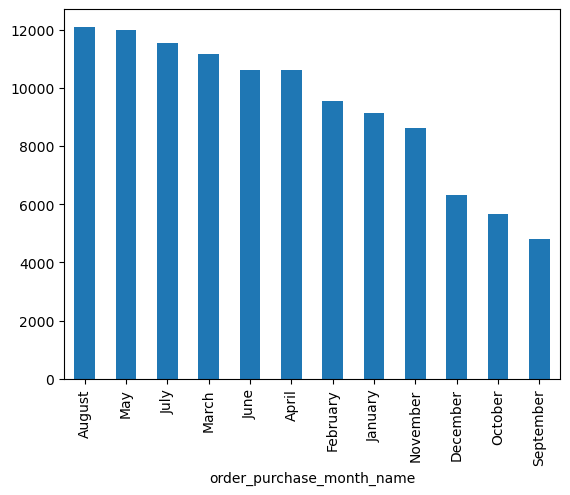

In [15]:
df_orderspermonth.plot.bar()

In [16]:
# quantas categorias??

df_orders_categorias = df_orders['product_category_name'].nunique()
df_orders_categorias

73

In [27]:
# categorias mais vendidas em agosto

df_agosto = df_orders_nc_month[df_orders_nc_month['order_purchase_month']==8]
df_agosto_top5 = df_agosto.groupby('product_category_name').count()
df_agosto_top5

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,order_purchase_month,order_purchase_month_name
product_category_name,,,,,,,,,,,
agro_industria_e_comercio,22,22,22,22,22,22,22,22,22,22,22
alimentos,124,124,124,124,124,124,123,124,124,124,124
alimentos_bebidas,36,36,36,36,36,36,36,36,36,36,36
artes,22,22,22,22,22,22,22,22,22,22,22
artes_e_artesanato,9,9,9,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...
sinalizacao_e_seguranca,26,26,26,26,26,26,26,26,26,26,26
tablets_impressao_imagem,6,6,6,6,6,6,6,6,6,6,6
telefonia,411,411,411,411,411,407,403,411,411,411,411


### 1.3. Objetivo mensal / dias de faturação – objetivo diário

In [18]:
# Objetivo mensal --> 5% a mais do que o mesmo mês no ano anterior

df_objetivo_mensal

NameError: name 'df_objetivo_mensal' is not defined

## 2. Valor de Faturação

### 2.1.  Valor de faturação por dia/semana/mês

### 2.2. Acumulado mensal/anual

### 2.3. Valor em falta para atingir ao objetivo semanal/mensal/anual

## 3. Nº de Vendas

### 3.1. Número de vendas efetuadas por dia/semana/mês

### 3.2. Acumulado mensal/anual

### 3.3. Valor em falta para atingir ao objetivo semanal/mensal/anual

## 4. Nº de Produtos Vendidos

### 4.1. Número de produtos vendidos por dia/semana/mês

### 4.2. Acumulado mensal/anual

### 4.3. Valor em falta para atingir ao objetivo semanal/mensal/anual

## 5.Venda Média

### 5.1. Valor médio de venda por dia/semana/mês

### 5.2. Média mês/ano

### 5.3. Valor em falta para atingir o objetivo semanal/mensal/anual

## 6. Ticket Médio

### 6.3. Valor médio de cada venda

### 6.2. Valor vendido no mês / número de vendas efetuadas no mês

## 7. Margem de lucro

### 7.1. Margem de lucro = preço de venda – custo do produto / preço de venda

### 7.2. % de produtos vendidos de nova coleção x outlet ou promoção 

## 8. Produtos

### 8.1. Média de produtos por compra (mensal/anual)

### 8.2. Taxa de devoluções

### 8.3. Dados de itens comprados juntos

### 8.4. Níveis de inventário

### 8.5. Sell out (data de entrada do produto para venda vs níveis de inventário e vendas efetivas)

8.5.1. “fast movers” vs. “slow movers”

### 8.6. Produtos mais comprados

### 8.7. Valor médio dos produtos mais comprados

## 9. Clientes

### 9.1. Localização dos clientes

### 9.2. Regiões com maior e menor número de consumidores

### 9.3. Vendas temporais por região (verificar se há feriados regionais que impulsionam as vendas, por exemplo)

### 9.4. Captação de clientes (e-mails):

### 9.5. Número de registos mensais / passagem de contatos qualificados para clientes

### 9.6. Vendas a clientes novos vs. vendas a clientes existentes

### 9.7. Custos de angariação vs. custos de conversão vs. custos de fidelização

9.7.1. Customer lifetime value (LTV)

9.7.2. Mês de aquisição do cliente --> custos de marketing desse mês

9.7.3. Quantidade de compras efetuadas pelo cliente ao longo de um ano

9.7.4. Verificar margem dos produtos comprados
